# Assignment 04 - Garbage Bin Classification problem 


This assignment is the continuation of assignmet 01, where the teams where tasked with designing a garbage classification system.

For the first assignmnet 4,068 images were collected. With the following distribution:

- **Blue bin** (recyclabele): 2,398 images
- **Green bin** (compostable):      826 images
- **Black bin** (landfill):         844 images 


For this assignment, your team needs to develop/implement/code the garbage classification model. You are free to use any technique seen in class that you want (*e.g.*, CNNs, transfer learning, etc.). You will have access only to the development set. The TAs will run your code on the test set to extract the accuracy and confusion matrix metrics.

The development set can be downloaded here:

- [OneDrive](https://uofc-my.sharepoint.com/:u:/g/personal/roberto_medeirosdeso_ucalgary_ca/EYEMTmqSm9RGodAIQDKB5lwBp2xyWtNm8qQ0wj7JV2XiPA?e=1xhhDh) - Link expires March 10th, 2021.
- [GDrive](https://drive.google.com/file/d/1-q56xKd4yEsFo5xwz5Rd1Zn_lyCXLaMU/view?usp=sharing)

The data has been already pre-processed for you. Images were resized to 512 x 400 pixels. Be mindful that a considerable number of samples in the development set may have been incorrectly labeled. Your team is free to fix some of the labels if you think this will help to develop your model. [See what goes where](https://www.calgary.ca/uep/wrs/what-goes-where/default.html) to get information about the labels.


The Jupyter Notebook should be divided in two parts: 1. Model development; 2. Model testing. The model development will be run by you, while the model testing will be run by the TAs when grading the assignment.


The deliverables for this assignment are:

1. This jupyter-notebook completed with your solution. 
    - Name the notebook as enel645_assignment04_team_(team number).ipynb
2. The weights of your best model after training. 
    - Name the weights' file as team_(team number)_garbage.h5 


Submit the two files (notebook + models' weights) to your dropbox in the course D2L page.
    
You are free to add extra cells of text and code to this notebook. You are free to use the TALC cluster to train your model, but remember that your code should be submitted as a Jupyter Notebook and not ".py" file.

At the end of the notebook, please include a short description of what each team member did in the assignment. Also include the consensus score between 0 and 3 to each team member. This score will be used to adjust the final 
grade of each student. Students developing the project individually do not need this description and score.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 30% 
4. Accuracy of the models  - 30%


## 1. Model development;

In [1]:
# Develop your model here feel free to add additional cells
# Comment and justify your choices as much as you can.

## 2. Model Testing

In [ ]:
# You are free to adapt this portion of the code, but you should 
# compute the test accuracy and show the images that 
# were classified incorrectly
test_data_dir = "/media/roberto/f5da97cf-b92d-484c-96e9-15766931cebe/Garbage-classification/Dataset-curated/Resized/Test/"

model.load_weights(model_name)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0) 
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size= batch_size,shuffle = False)
nb_samples = len(glob.glob(test_data_dir + "*/*"))
model.evaluate(test_generator)

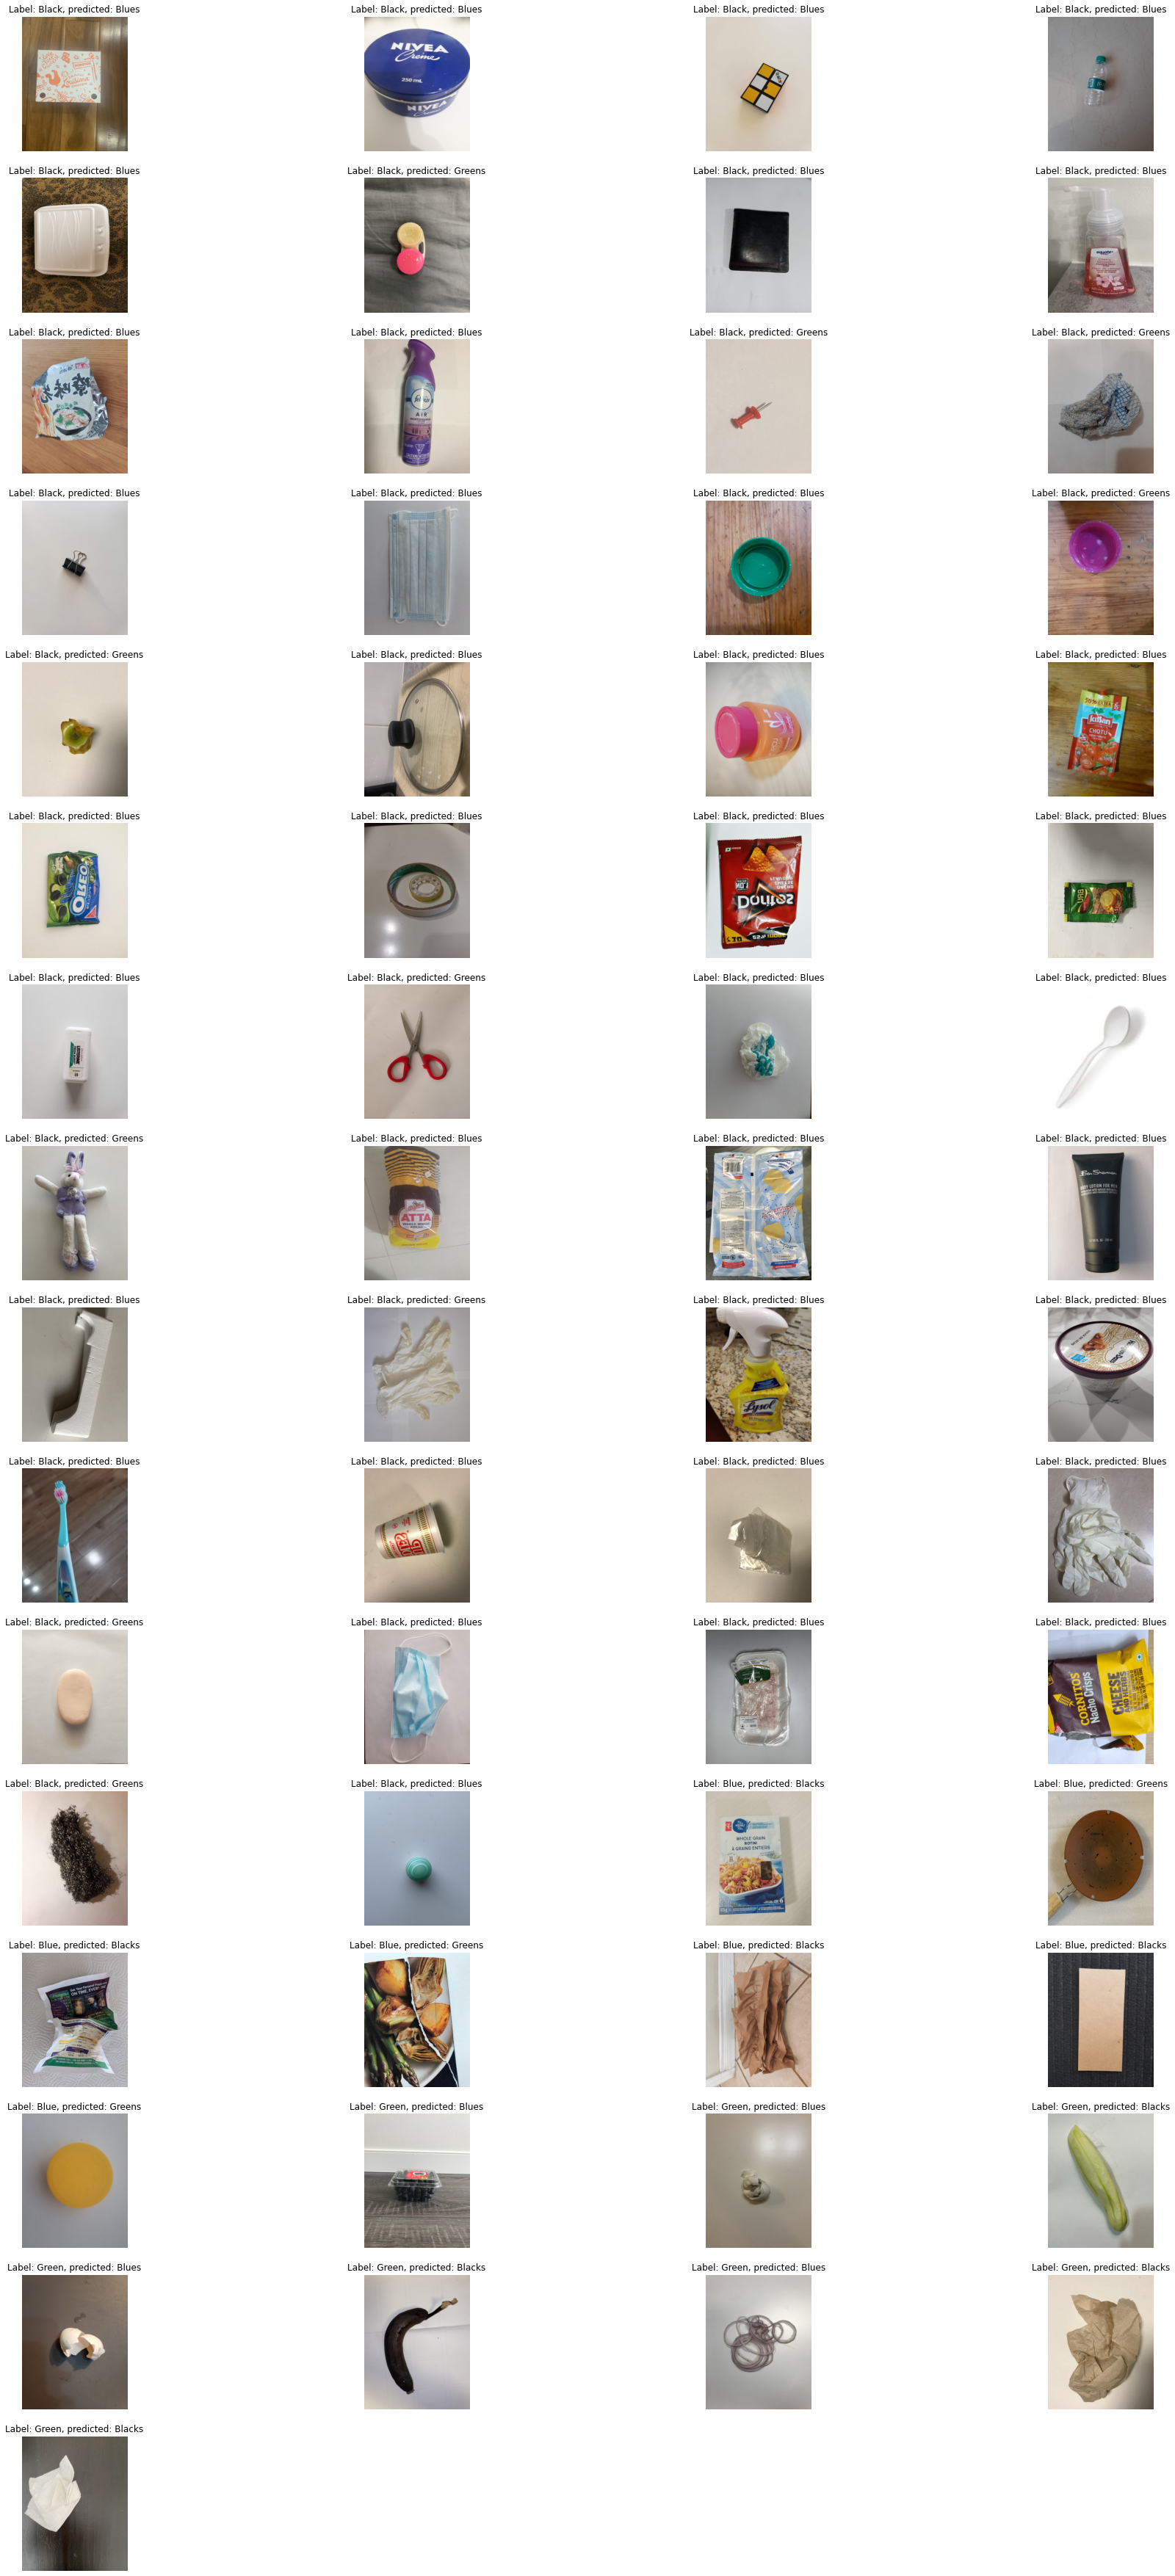

In [53]:
img = []
true_label = []
pred_label = []
for ii in range(nb_samples//batch_size):
    Xbatch,Ybatch = test_generator.__getitem__(ii)
    Ybatch = Ybatch.argmax(axis = 1)
    Ypred = model.predict(Xbatch).argmax(axis = 1)
    wrong_indexes = np.where(Ypred != Ybatch)[0]
    for ii in wrong_indexes:
        img.append(Xbatch[ii])
        true_label.append(Ybatch[ii])
        pred_label.append(Ypred[ii])

columns = 4
rows = len(img)//columns + 1    
plt.figure(figsize = (32,64))
for ii in range(len(img)):
    plt.subplot(rows,columns,ii+1)
    plt.imshow(img[ii], cmap = "gray")
    plt.axis("off")
    plt.title("Label: %s, predicted: %ss" %(class_names[true_label[ii]]\
                                            ,class_names[pred_label[ii]]))
plt.show()

##  Team members participtaion
(include the description of what each team member did and the consensus score for each team member)

- **Arya Stark** helped design the model and write the code for fully connected model (**score 3**)
- **Luke Skywalker** helped design helped to implement the data augmentation module (**score 3**)
- ...